In [1]:
%matplotlib inline

In [13]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import wrf
import matplotlib as mpl

In [147]:
import numpy as np

In [3]:
plt.rc("font",size=16)

### functions

In [202]:
mpl.rcParams['font.family']

['sans-serif']

In [203]:
from matplotlib.font_manager import findfont, FontProperties


In [204]:
font = findfont(FontProperties(family=['sans-serif']))

In [205]:
font

'/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'

In [8]:
 def get_plot_element(infile):
    rootgroup = Dataset(infile, 'r')
    p = wrf.getvar(rootgroup, 'ter')
    lats, lons = wrf.latlon_coords(p)
    cart_proj = wrf.get_cartopy(p)
    xlim = wrf.cartopy_xlim(p)
    ylim = wrf.cartopy_ylim(p)
    return cart_proj, xlim, ylim

### i/o

In [181]:
infile_d01 = '/glade/scratch/doubrawa/gray_zone/VLES/033015/wrfout_d01_2015-03-31_00:00:00'
cart_proj, xlim_d01, ylim_d01 = get_plot_element(infile_d01)

infile_d02 = '/glade/scratch/doubrawa/gray_zone/VLES/033015/wrfout_d02_2015-03-31_00:00:00'
_, xlim_d02, ylim_d02 = get_plot_element(infile_d02)

infile_d03 = '/glade/scratch/doubrawa/gray_zone/VLES/033015/wrfout_d03_2015-03-31_00:00:00'
_, xlim_d03, ylim_d03 = get_plot_element(infile_d03)

In [182]:
wrfnc = Dataset('/glade/scratch/doubrawa/gray_zone/VLES/033015/wrfout_d01_2015-03-31_00:00:00','r')              
ter = wrf.getvar(wrfnc, "ter", timeidx=0)
lons = wrf.getvar(wrfnc,"XLONG")
lats = wrf.getvar(wrfnc,"XLAT")

### larger plot

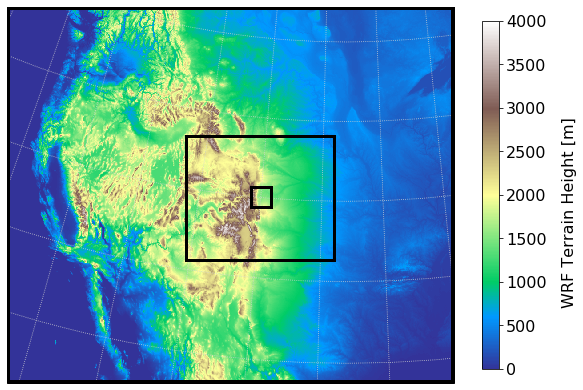

In [197]:
fig = plt.figure(figsize=(10,8))
ax  = plt.axes(projection=cart_proj)

p = ax.pcolormesh(wrf.to_np(lons),wrf.to_np(lats),wrf.to_np(ter),transform=ccrs.PlateCarree(),cmap='terrain',
                 vmin=0,vmax=4000)
 
# d01 box
ax.add_patch(mpl.patches.Rectangle((xlim_d01[0], ylim_d01[0]), xlim_d01[1]-xlim_d01[0], ylim_d01[1]-ylim_d01[0],
             fill=None, lw=3, edgecolor='k', zorder=10))
 
# d02 box
ax.add_patch(mpl.patches.Rectangle((xlim_d02[0], ylim_d02[0]), xlim_d02[1]-xlim_d02[0], ylim_d02[1]-ylim_d02[0],
             fill=None, lw=3, edgecolor='black', zorder=10))

# d03 box
ax.add_patch(mpl.patches.Rectangle((xlim_d03[0], ylim_d03[0]), xlim_d03[1]-xlim_d03[0], ylim_d03[1]-ylim_d03[0],
             fill=None, lw=3, edgecolor='black', zorder=10))

ax.set_extent([-121.7, -90.6, 28.8, 49.95], crs=ccrs.PlateCarree())

ax.gridlines(xlocs=np.arange(-160.0,-69.0,5),
             ylocs=np.arange(10,81,5),
             crs=ccrs.PlateCarree(),linestyle=':',color='lightgrey')

clb = plt.colorbar(p,pad=0.05,shrink=0.8)
clb.set_label(r'WRF Terrain Height [m]', labelpad=15, y=0.45)
fig.savefig("/glade/u/home/doubrawa/figs/wrf-domains_d01_d02_d03.png",dpi=500,bbox_inches='tight')

### i/o

In [192]:
infile_d04 = '/glade/scratch/doubrawa/junk/les/mesoscale/real-1hOffset/032815/wrfinput_d04'
_, xlim_d04, ylim_d04 = get_plot_element(infile_d04)

In [193]:
wrfnc = Dataset('/glade/scratch/doubrawa/gray_zone/VLES/033015/wrfout_d03_2015-03-31_00:00:00','r')              
ter2 = wrf.getvar(wrfnc, "ter", timeidx=0)
lons2 = wrf.getvar(wrfnc,"XLONG")
lats2 = wrf.getvar(wrfnc,"XLAT")

### smaller plot

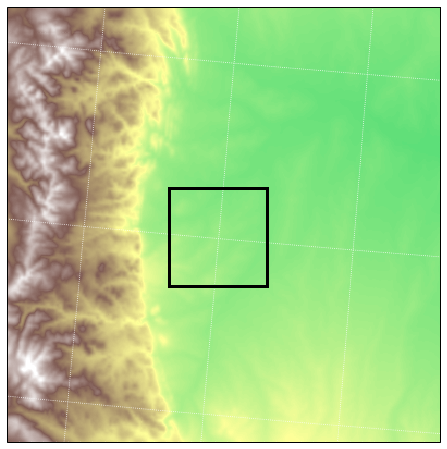

In [200]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection=cart_proj)

p = ax.pcolormesh(wrf.to_np(lons2),wrf.to_np(lats2),wrf.to_np(ter2),transform=ccrs.PlateCarree(),cmap='terrain',
                 vmin=0,vmax=4000)

# d04 box
ax.add_patch(mpl.patches.Rectangle((xlim_d04[0], ylim_d04[0]), xlim_d04[1]-xlim_d04[0], ylim_d04[1]-ylim_d04[0],
             fill=None, lw=3, edgecolor='k', zorder=10))

ax.set_extent([-105.72, -104.24, 39.47, 40.61], crs=ccrs.PlateCarree())

ax.gridlines(xlocs=[-106.0, -105.5, -105, -104.5, -104.0],
             ylocs=[39.0,39.5,40.0,40.5,41.0],
             crs=ccrs.PlateCarree(),linestyle=':',color='w')

# ticks = [(-105.5,39.5)]

# lon_ticks_transformed = []
# lat_ticks_transformed = []
# lon_ticks_string = []
# lat_ticks_string = []
# for tick in ticks:
#     lontick,lattick=tick
#     lon_tick_transformed, lat_tick_transformed = cart_proj.transform_point(lontick, lattick, ccrs.PlateCarree())
#     lon_ticks_transformed.append(lon_tick_transformed)
#     lat_ticks_transformed.append(lat_tick_transformed) 
#     lon_ticks_string.append("{0:.2f}".format(np.abs(lontick)))
#     lat_ticks_string.append("{0:.2f}".format(lattick))

    
    
# ax.set_xticks(lon_ticks_transformed)
# ax.set_yticks(lat_ticks_transformed)

# ax.set_xticklabels(lon_ticks_string)
# ax.set_yticklabels(lat_ticks_string)

# ylim_d03[0]

# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)
# clb = plt.colorbar(p,pad=0.05,shrink=0.8)
# clb.set_label(r'WRF Terrain Height [m]', labelpad=15, y=0.45)
fig.savefig("/glade/u/home/doubrawa/figs/wrf-domains_d03_gz_d04_les.png",dpi=500,bbox_inches='tight')